# Assignment 5 (Q2) Toyota Corolla

## Q2. Consider only the below columns and prepare a prediction model for predicting Price. Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] Model -- model of the car Price  -- Offer Price in EUROs	Age_08_04 -- Age in months as in August 2004	Mfg_Month -- Manufacturing month (1-12)	 Mfg_Year	-- Manufacturing Year  KM -- Accumulated Kilometers on odometer Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG) HP -- Horse Power Met_Color	 -- Metallic Color?  (Yes=1, No=0) Color -- Color (Blue, Red, Grey, Silver, Black, etc.) Automatic	-- Automatic ( (Yes=1, No=0) cc -- Cylinder Volume in cubic centimeters Doors -- Number of doors Cylinders	-- Number of cylinders Gears -- Number of gear positions Quarterly_Tax -- Quarterly road tax in EUROs Weight -- Weight in Kilograms Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0) BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0) Guarantee_Period -- 	Guarantee period in months ABS -- Anti-Lock Brake System (Yes=1, No=0) Airbag_1 -- Driver_Airbag  (Yes=1, No=0) Airbag_2 -- Passenger Airbag  (Yes=1, No=0) Airco -- Airconditioning  (Yes=1, No=0) Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0) Boardcomputer -- Boardcomputer  (Yes=1, No=0) CD_Player -- CD Player  (Yes=1, No=0) Central_Lock -- Central Lock  (Yes=1, No=0) Powered_Windows -- Powered Windows  (Yes=1, No=0) Power_Steering -- Power Steering  (Yes=1, No=0) Radio -- Radio  (Yes=1, No=0) Mistlamps	-- Mistlamps  (Yes=1, No=0) Sport_Model -- Sport Model  (Yes=1, No=0) Backseat_Divider -- Backseat Divider  (Yes=1, No=0) Metallic_Rim --Metallic Rim  (Yes=1, No=0) Radio_cassette -- Radio Cassette  (Yes=1, No=0) Tow_Bar -- Tow Bar  (Yes=1, No=0) 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Read Dataset
toyota=pd.read_csv('ToyotaCorolla.csv',encoding = 'latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


## EDA 

In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Color               1436 non-null object
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1  

In [4]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [5]:
toyota2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [6]:
toyota3=toyota2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [7]:
toyota3[toyota3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
toyota4=toyota3.drop_duplicates().reset_index(drop=True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [9]:
toyota4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Analysis 

<AxesSubplot:>

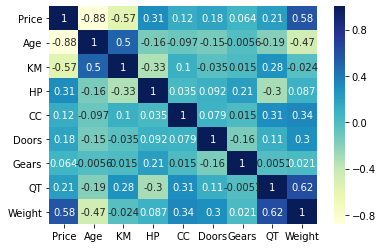

In [10]:
sns.heatmap(toyota4.corr(),cmap = 'YlGnBu',annot = True)

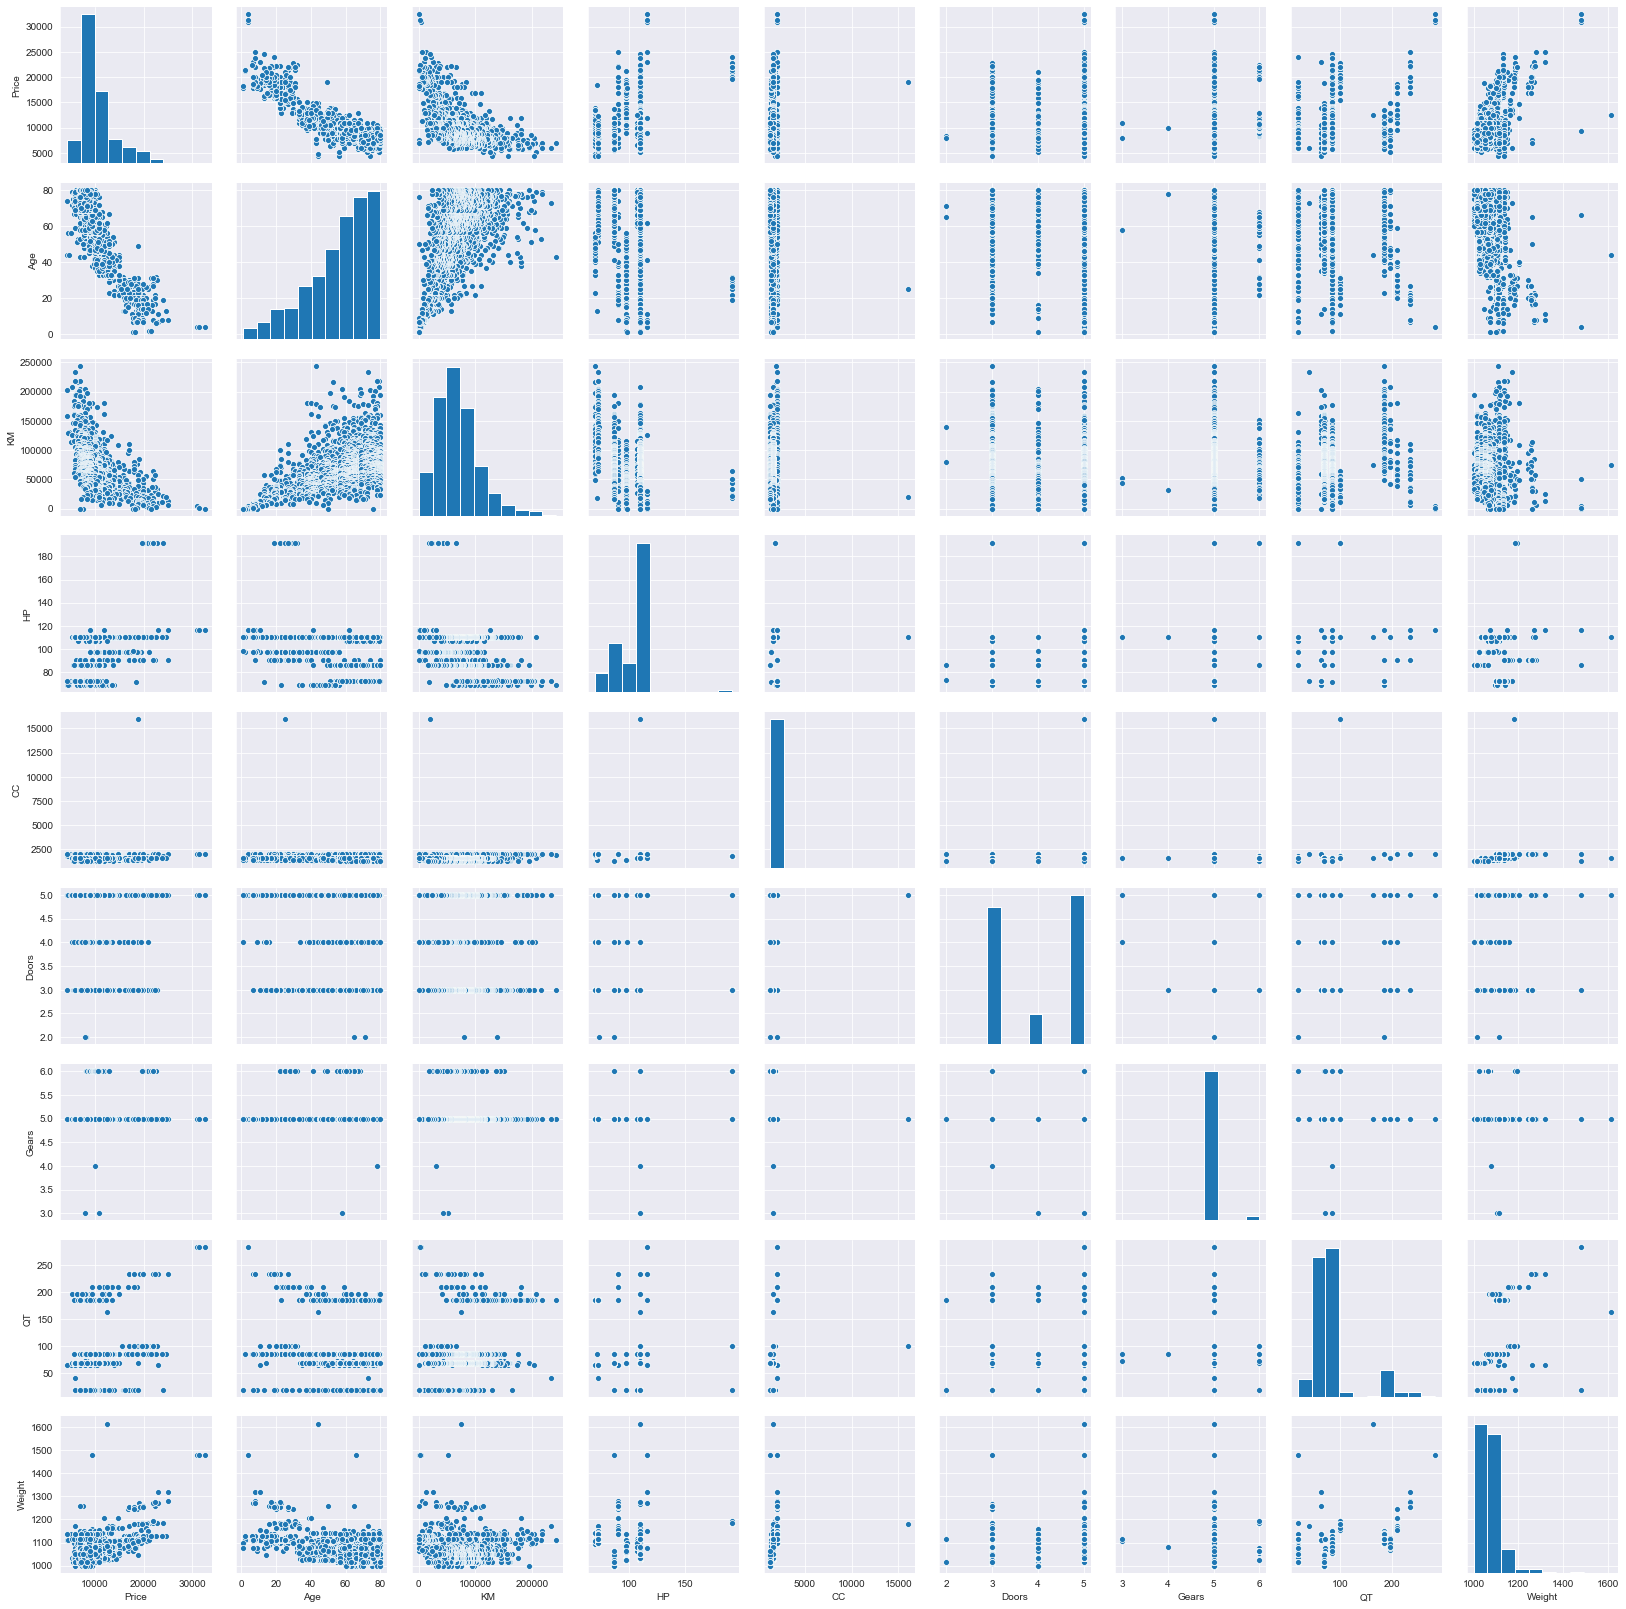

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota4)

## Model Building

In [12]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit()

## Model Testing

In [13]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [14]:
# Finding Tvalues and Pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64, Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [15]:
# Finding R-squared values
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [16]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their Tvalues and Pvalues

In [17]:
slr_cc=smf.ols('Price~CC',data=toyota4).fit()
slr_cc.tvalues , slr_cc.pvalues 

(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [18]:
slr_doors=smf.ols('Price~Doors',data=toyota4).fit()
slr_doors.tvalues , slr_doors.pvalues 

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [19]:
mlr_ccdoors=smf.ols('Price~CC+Doors',data=toyota4).fit()
mlr_ccdoors.tvalues , mlr_ccdoors.pvalues 

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

## Model Validation Techniques

## Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [20]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [21]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

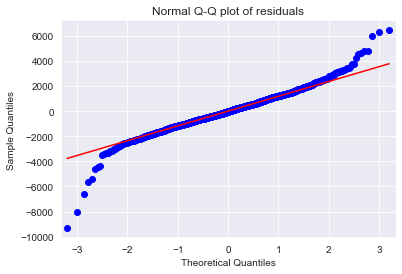

In [22]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid>6000))  # outlier detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [24]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [25]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

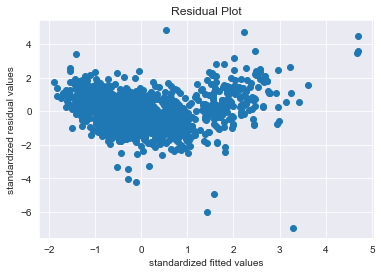

In [26]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [27]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

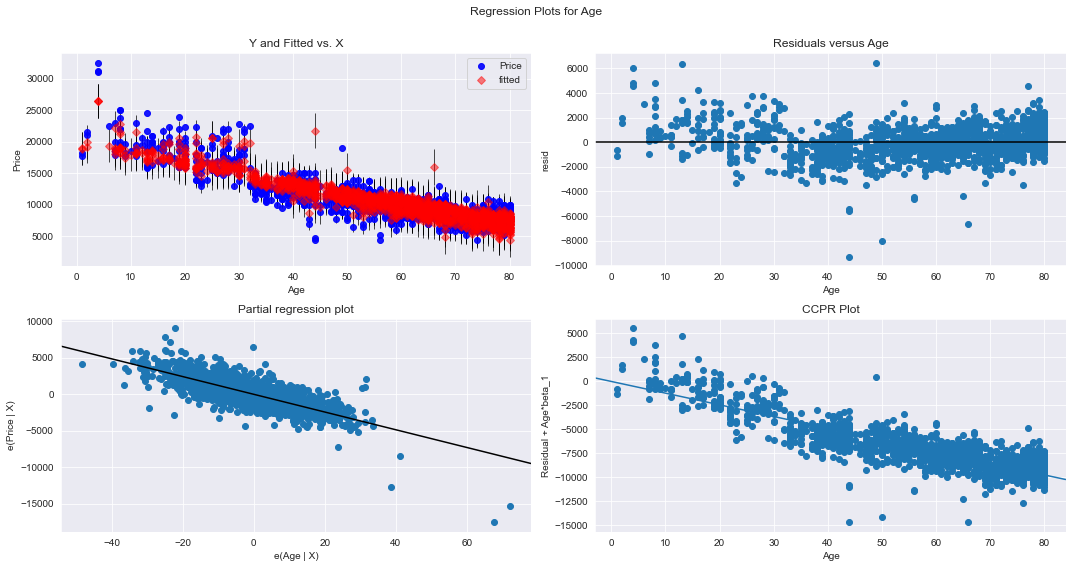

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

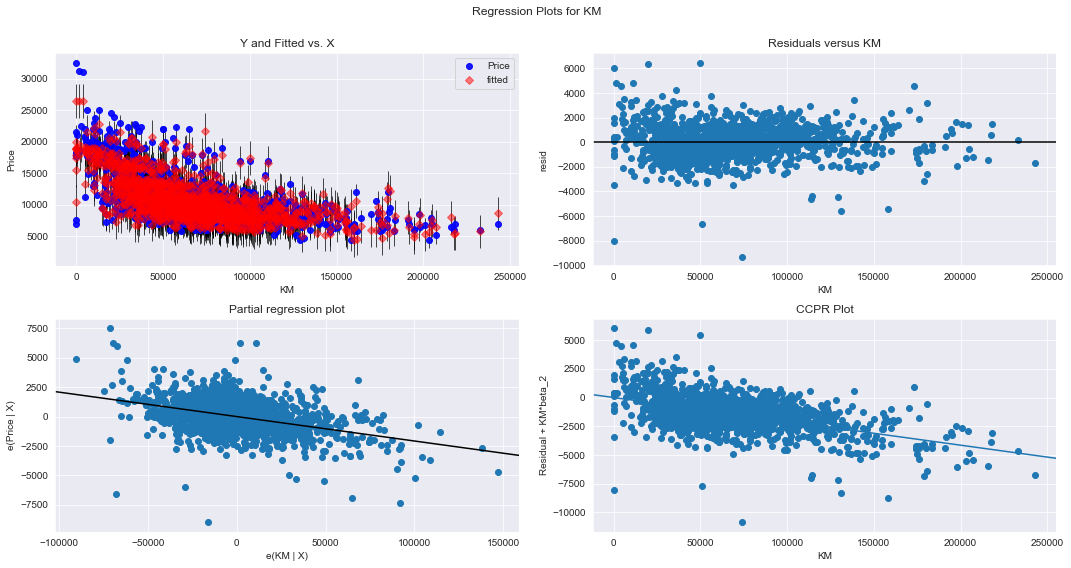

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

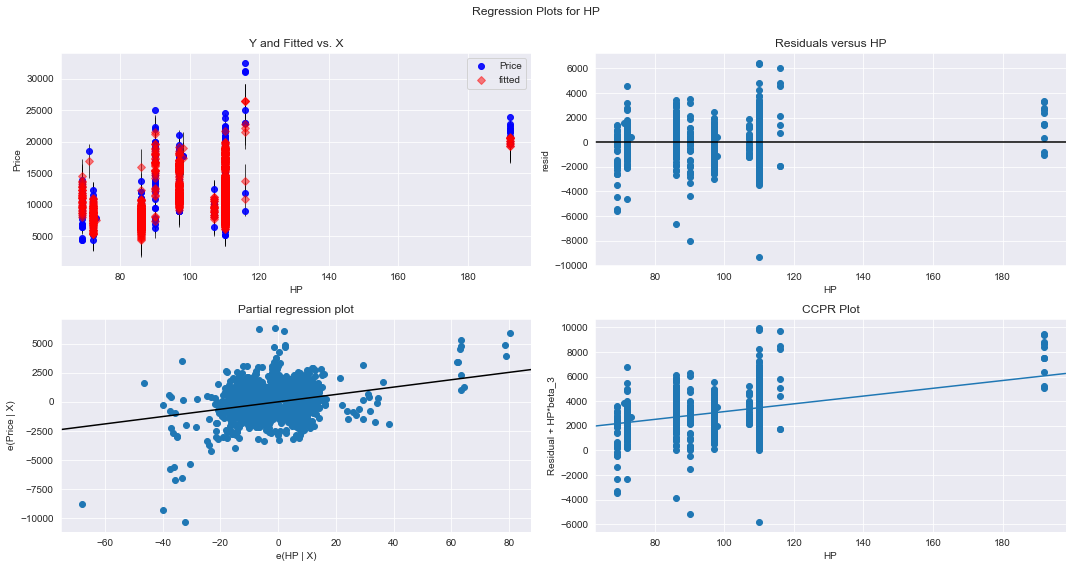

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

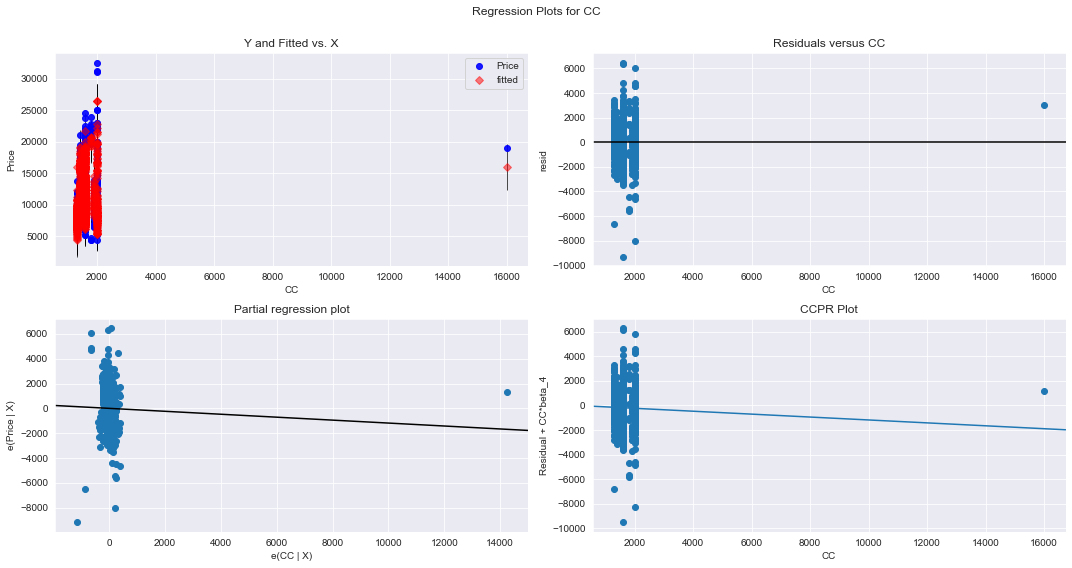

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

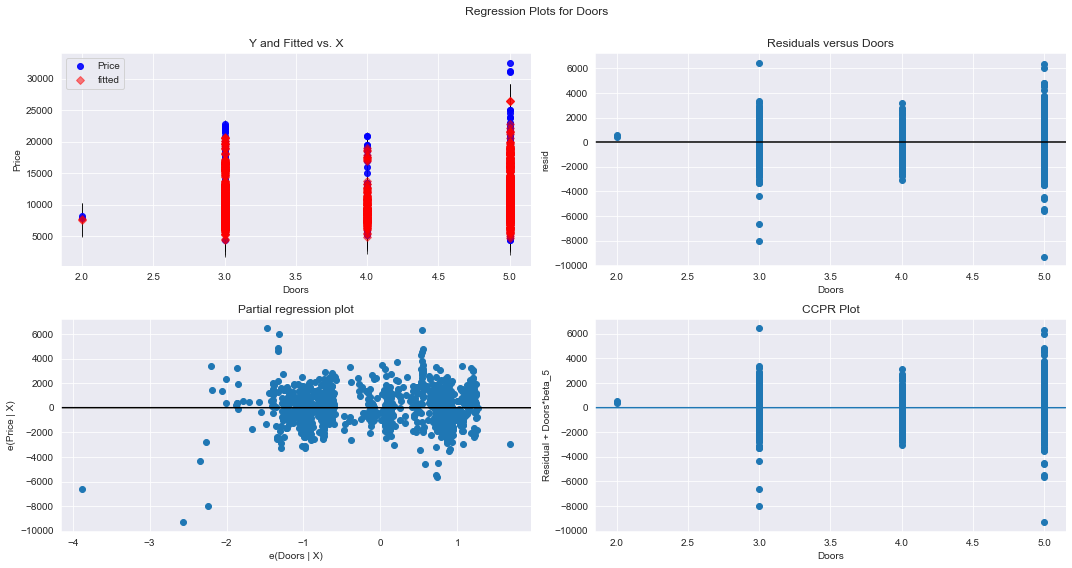

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

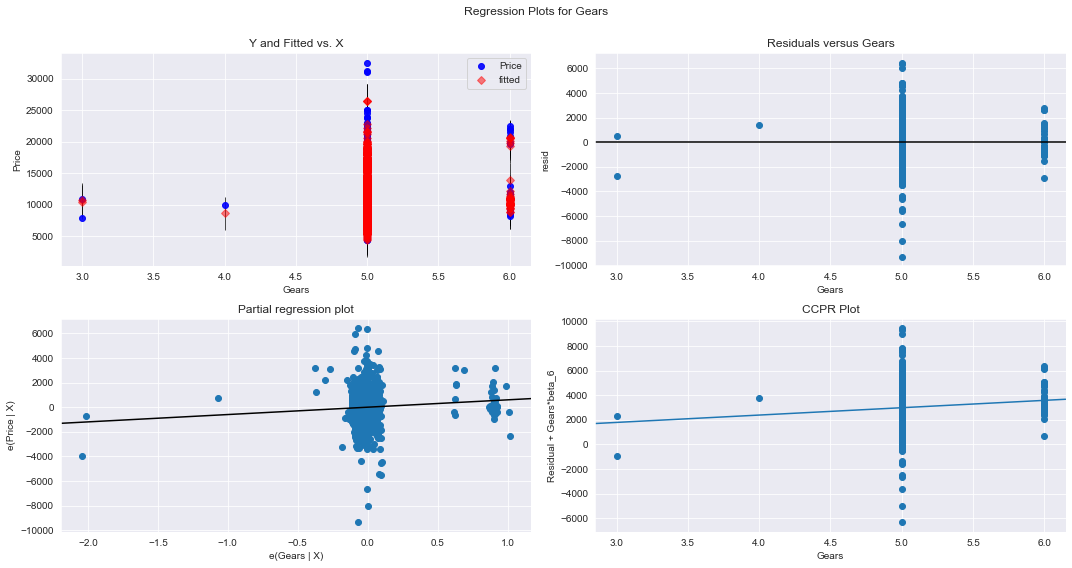

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

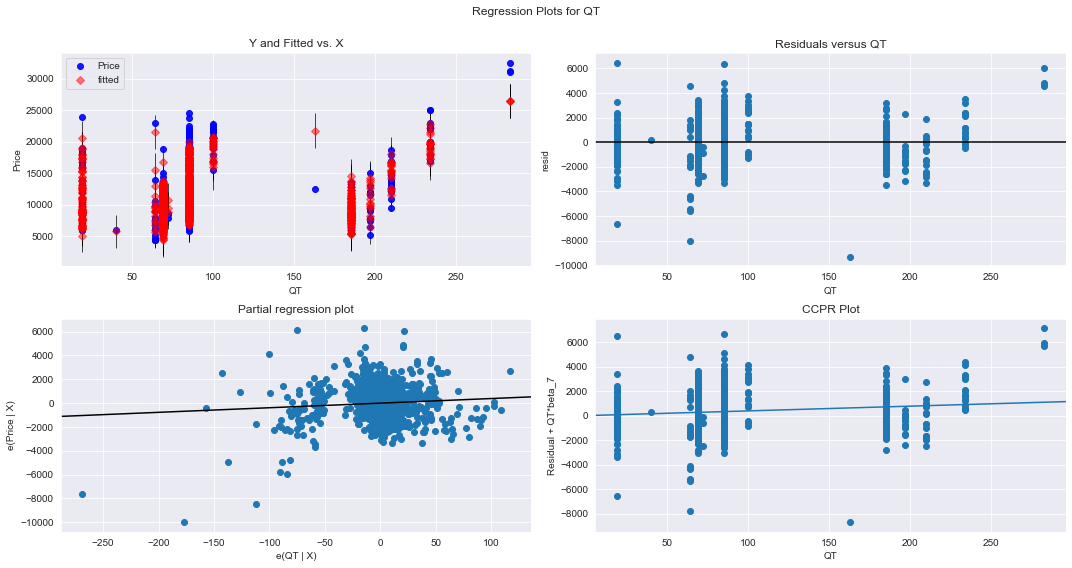

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

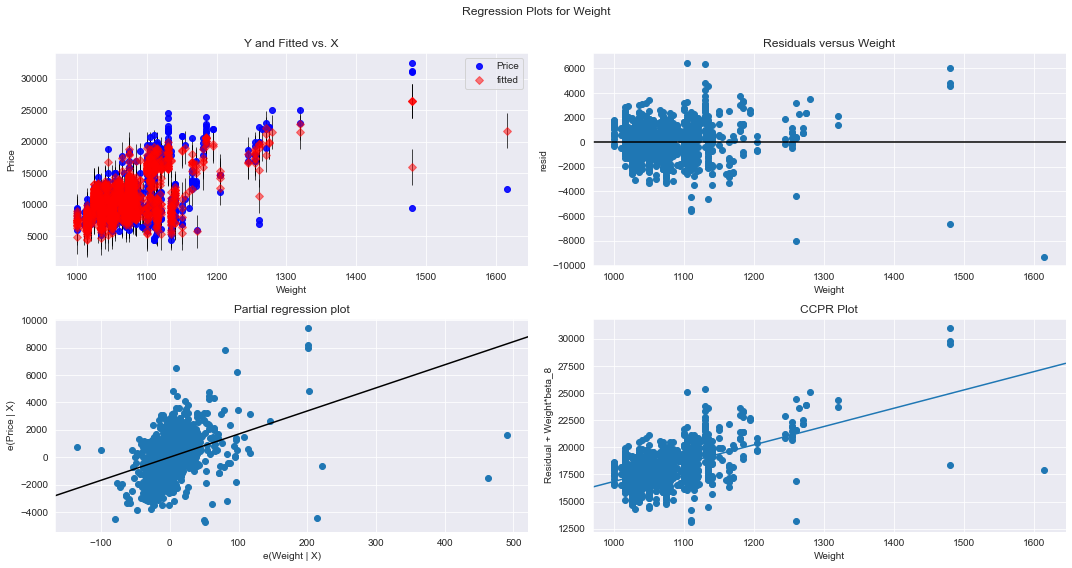

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

## Model Deletion Diagnostics (Checking for Outliers or Influencers) 

## Two Techniques : 1. Cook's Distance & 2. Leverage value 

In [36]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

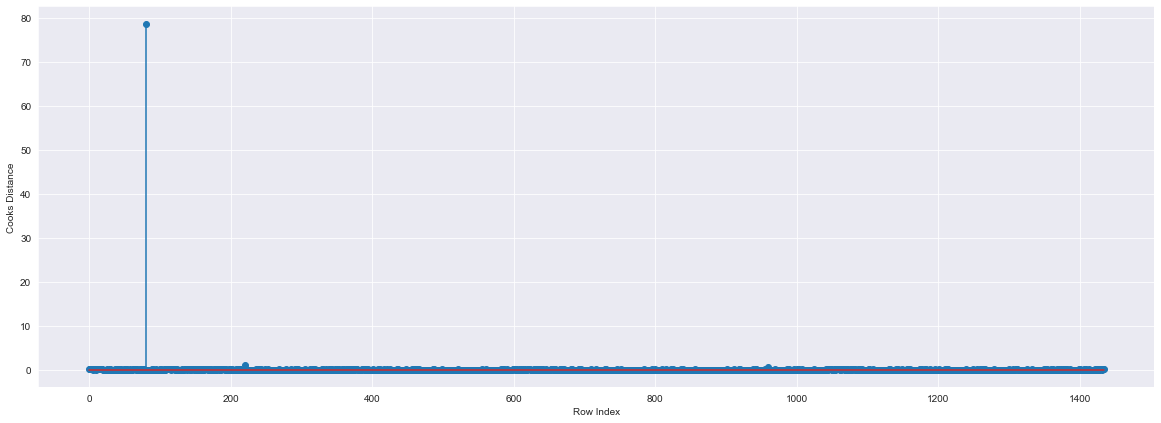

In [37]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.7295058224916)

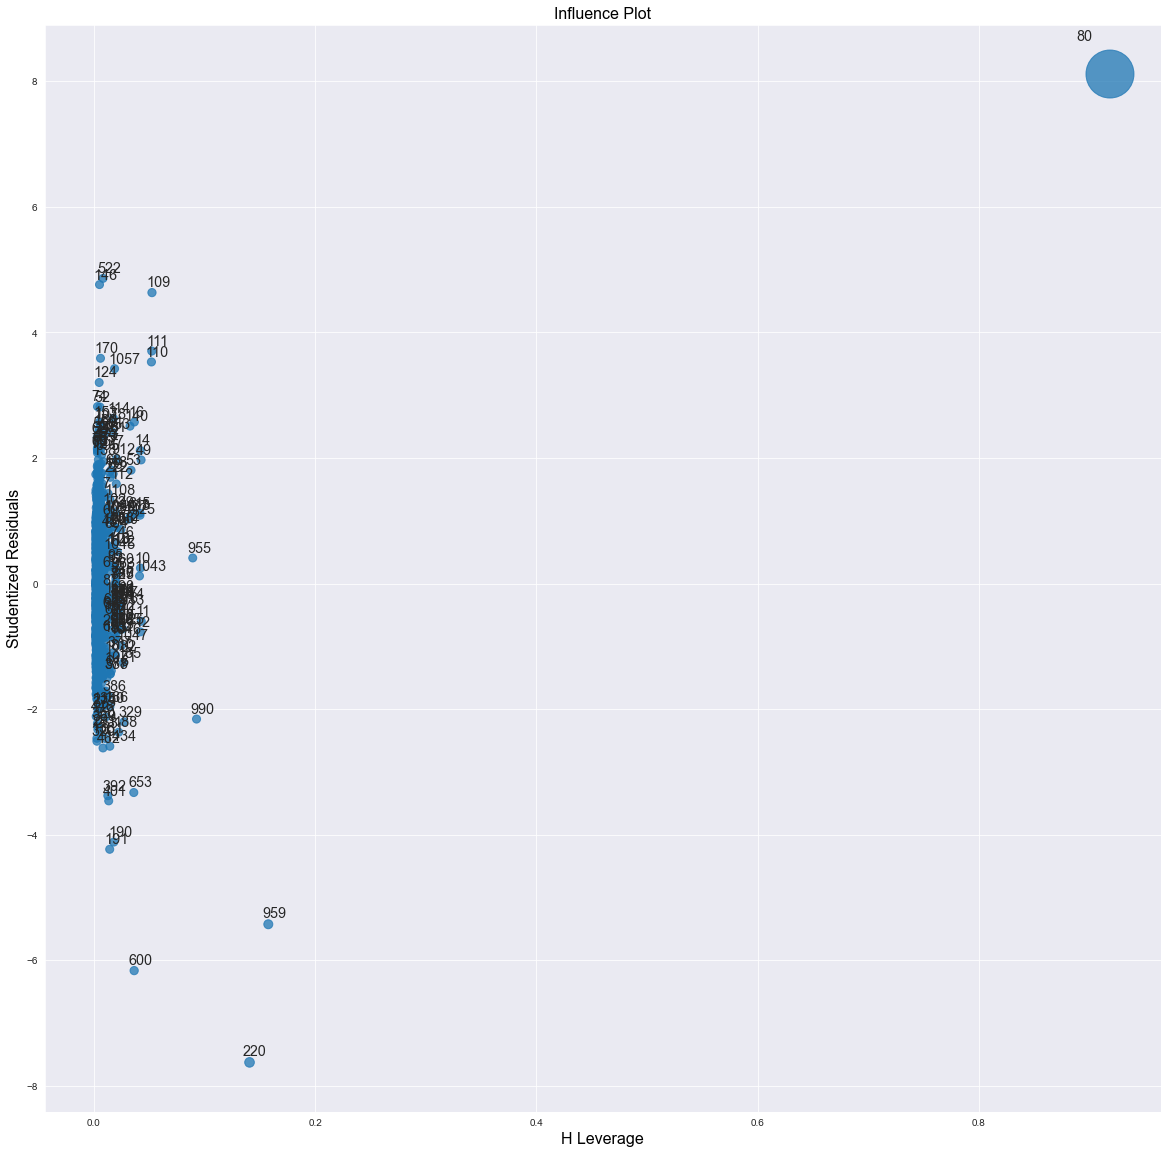

In [39]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [40]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of Features/Columns & n = No. of Datapoints
k=toyota4.shape[1]
n=toyota4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [41]:
# From the above plot, it is evident that points beyond leverage cutoff value=0.020905 are the outliers 

In [42]:
toyota4[toyota4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the Model 

In [43]:
# Creating a copy of data so that original dataset is not affected
toyota_new=toyota4.copy()
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota5=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


## Model Deletion Diagnostics and Final Model

In [45]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [46]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [47]:
final_model.rsquared

0.8882395145171204

In [48]:
toyota5

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


## Model Predictions 

In [49]:
# Let's Say New data for Prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [50]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [51]:
# Automatic Prediction of Price 
pred_y=final_model.predict(toyota5)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
5       15264.967942
6       17632.593606
7       17632.436530
8       20858.294497
9       13547.700232
10      21340.722649
11      21457.083570
12      21327.854320
13      20828.061607
14      20520.936964
15      21234.490235
16      20274.413724
17      16454.705950
18      14860.707076
19      15038.716446
20      14980.367056
21      17653.933665
22      15883.025567
23      16309.536456
24      16312.418359
25      16707.286031
26      16378.809115
27      16036.633085
28      16098.799881
29      16462.296182
            ...     
1401     9143.140408
1402     9828.505396
1403     8046.616940
1404     9025.174625
1405     6813.120197
1406     8918.127762
1407     9289.746780
1408    10021.518994
1409     8086.529973
1410     8972.777790
1411     9820.908182
1412     9158.604679
1413     8069.226166
1414     8695.668806
1415     9345.977711
1416     8537.338862
1417     8416